In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
from sklearn.model_selection import learning_curve

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn = KNeighborsClassifier()

In [23]:
from sklearn.linear_model import LogisticRegression

In [11]:
import numpy as np

In [20]:
np.linspace(0.1,1.1,10, endpoint=False)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [24]:
train_size, train_score, test_score = learning_curve(LogisticRegression(), data.data, data.target,
                                                    train_sizes=np.linspace(0.1,1.1,10, endpoint=False))

C:\Users\sunde\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sunde\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [8]:
# !pip install -U sklearn-evaluation

In [9]:
import sklearn_evaluation

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

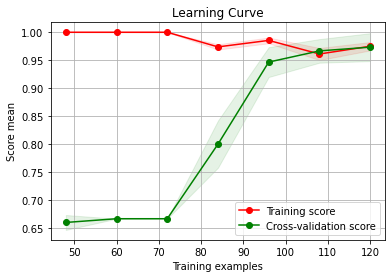

In [25]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

특징 : 전통적인 ML 기법은 타 프레임워크와 연동하게 !!!

In [26]:
import tensorflow as tf

In [105]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [29]:
X_train = X_train[...,tf.newaxis] / 255

In [40]:
X_test = X_test[...,tf.newaxis] / 255 # 안해서 

In [109]:
y_train = tf.keras.utils.to_categorical(y_train)

In [72]:
import tensorflow_addons as tfa

In [ ]:
tfa.metrics.F1Score

In [88]:
from sklearn.metrics import recall_score

In [120]:
input_ = tf.keras.Input((28,28,1))
x = tf.keras.layers.Conv2D(32,3)(input_)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(32,3)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(input_, x)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
             metrics=[tfa.metrics.F1Score(10)]) # F1Score 바로 구할 수 있음

# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.Precision()])

'''
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # F1Score 쓰려면 음수값 나오면 안되서 False
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]) # Precision, Recall 구하면 F1Score 구할 수 있음
'''

In [121]:
model.summary()

Model: "model_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_52 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_102 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 re_lu_153 (ReLU)            (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 11, 11, 32)        9248      
                                                                 
 re_lu_154 (ReLU)            (None, 11, 11, 32)        0         
                                                          

In [122]:
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3393 - f1_score: 0.9537
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0788 - f1_score: 0.9804
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0681 - f1_score: 0.9846
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0592 - f1_score: 0.9862
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0552 - f1_score: 0.9877
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0514 - f1_score: 0.9892
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0501 - f1_score: 0.9901
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0493 - f1_score: 0.9904
Epoch 9/10
 548/1875 [=======>......................] - ETA: 4s - loss: 0.0424 - f1_score: 0.9918

KeyboardInterrupt: 

In [35]:
import pandas as pd

<AxesSubplot:>

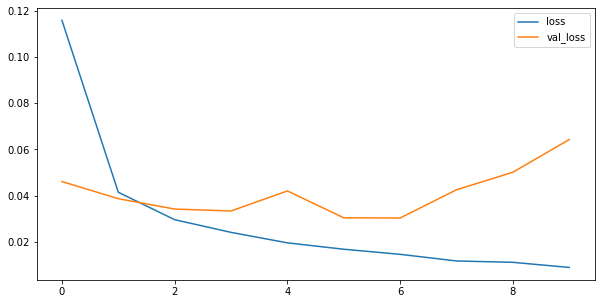

In [55]:
pd.DataFrame(history.history).plot.line(figsize=(10,5))

<AxesSubplot:>

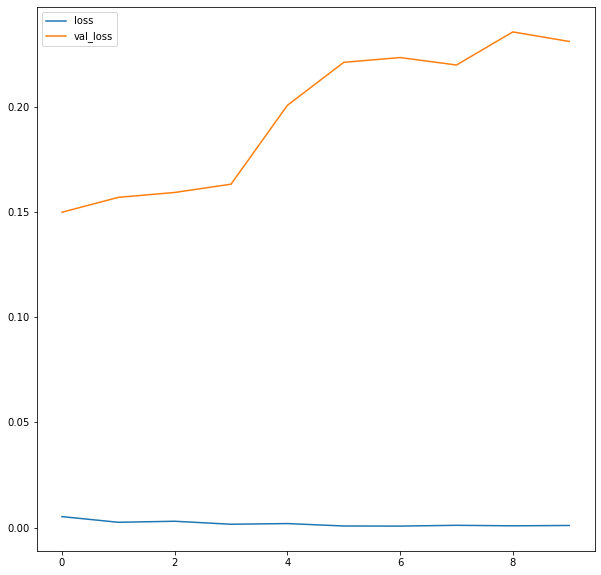

In [48]:
pd.DataFrame(history.history).plot.line(figsize=(10,10)) # pooling (x)

#### 함수형 패러다임 > 
- 반복 실험
- 함수형 연동하기 위해서

In [66]:
def build_fn():
    
    input_ = tf.keras.Input((28,28,1))
    x = tf.keras.layers.Conv2D(32,3)(input_)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Conv2D(32,3)(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128)(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dense(10)(x)

    model = tf.keras.Model(input_, x)
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['acc'])
    
    return model

In [67]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [68]:
model = KerasClassifier(build_fn, epochs=5) # scikit-learn 과 연동할 수 있는 텐서플로우 모델

C:\Users\sunde\AppData\Local\Temp\ipykernel_16740\964211621.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn, epochs=5) # scikit-learn 과 연동할 수 있는 텐서플로우 모델


In [69]:
train_size, train_score, test_score = learning_curve(model, X_train, y_train, cv=2)

Epoch 1/5
94/94 [==============================] - 1s 5ms/step - loss: 0.6436 - acc: 0.7917
Epoch 2/5
94/94 [==============================] - 0s 3ms/step - loss: 0.1913 - acc: 0.9387
Epoch 3/5
94/94 [==============================] - 0s 3ms/step - loss: 0.1150 - acc: 0.9640
Epoch 4/5
94/94 [==============================] - 0s 3ms/step - loss: 0.0614 - acc: 0.9800
Epoch 5/5
94/94 [==============================] - 0s 2ms/step - loss: 0.0135 - acc: 0.9960
Epoch 1/5
305/305 [==============================] - 1s 3ms/step - loss: 0.3258 - acc: 0.8969
Epoch 2/5
305/305 [==============================] - 1s 3ms/step - loss: 0.0934 - acc: 0.9715
Epoch 3/5
305/305 [==============================] - 1s 3ms/step - loss: 0.0579 - acc: 0.9807
Epoch 4/5
305/305 [==============================] - 1s 3ms/step - loss: 0.0371 - acc: 0.9881
Epoch 5/5
305/305 [==============================] - 1s 2ms/step - loss: 0.0088 - acc: 0.9976
Epoch 1/5
516/516 [==============================] - 2s 3ms/step - los

In [70]:
train_score

array([[0.99599999, 0.99199998],
       [0.99764103, 0.99620515],
       [0.99757576, 0.99715149],
       [0.99582797, 0.99772042],
       [0.99426669, 0.99756664]])

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

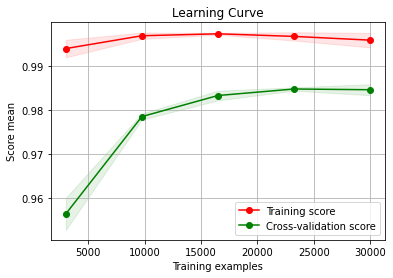

In [71]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

#### Lasso > L1
#### Ridge > L2
#### ElasticNet

#### CNN 도 linear 기 때문에 L1, L2 사용할 수 있다.

#### 과적합(Overfitting)을 막는 방법
- train data 가 많은 것(확실하다)
- Regularizer 사용
- Drop out : catastrophic forgetting 을 줄여주는 역할도 함, ensemble 효과있음
- Batch Normalizer 사용
- Model Checkpoint / Early Stopping

In [1]:
# overfitting
# tf.keras.regularizers.L1L2
# tf.keras.regularizers.l1_l2
# tf.keras.layers.Dropout
# tf.keras.callbacks.EarlyStopping
# tf.keras.callbacks.LearningRateScheduler
# tf.keras.callbacks.ReduceLROnPlateau